In [22]:
# Analyze Calvin and Hobbes comics at www.gocomics.com site
# plot the <3 value of each comic
from bs4 import BeautifulSoup
import urllib.request
import requests
from time import sleep
from random import randint

%matplotlib inline
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# requires from bs4 import BeautifulSoup
# import urllib.request
# import requests
def getSoup( url ):
    # Getting the webpage, creating a Response object.
    response = requests.get(url)

    # Extracting the source code of the page.
    data = response.text

    # Passing the source code to BeautifulSoup to create a BeautifulSoup object for it.
    soup = BeautifulSoup(data, 'html.parser')
    
    return soup

In [3]:
def getNextComic(soup):
    link = soup.findAll('a', {"class":"fa btn btn-outline-default btn-circle fa-caret-right sm "})
    nextURL = "https://www.gocomics.com" + link[0].get('href')
    return nextURL

In [4]:
def getFavoriteCount( soup ):
    spans = soup.findAll("span")
    for s in spans:
        ss = str(s)
        if "favorite" in ss:
            return ''.join(s.findAll(text=True))

In [5]:
def getCommentsCount( soup ):
    spans = soup.findAll("span")
    for s in spans:
        ss = str(s)
        if "count comments" in ss:
            return ''.join(s.findAll(text=True))

In [6]:
def getLikesCount( soup ):
    spans = soup.findAll("span")
    for s in spans:
        ss = str(s)
        if "count likes" in ss:
            return ''.join(s.findAll(text=True))

In [7]:
def getCurrentComicYear( soup ):
    meta = soup.findAll("meta", {"name":"description"})
    content = str(meta[0])
    return int(content[content.find("|")-5:content.find("|")])

In [8]:
def appendDataToFile( filename, data ):
    file = open(filename , "a")
    #file.write("URL,favorite,comment,like\n")
    file.write(data)
    file.close()

In [10]:
# MAIN...
# starting 
nextURL = "https://www.gocomics.com/calvinandhobbes/1991/10/04"
soup = getSoup(nextURL)
year = getCurrentComicYear(soup)



while(year < 2006 ):
    meta = soup.findAll("meta", {"name":"description"})
    # print date
    content = str(meta[0])
    print(content[content.find("|")-13:content.find("|")], end=": ")
    
    fave = getFavoriteCount(soup)
    comm = getCommentsCount(soup)
    like = getLikesCount(soup)
    
    data = nextURL + "," + str(fave) + "," + str(comm) + "," + str(like) + "\n"
    appendDataToFile("calvinComicsData.txt", data)
    print("Favorites", getFavoriteCount(soup))
    nextURL = getNextComic(soup)
    
    # Let's add a bit of delay to "webscrape nicely"
    sleep(10 + randint(1,10))
    
    soup = getSoup( nextURL )
    year = getCurrentComicYear(soup)
print("done")

 Oct 4, 1991 : Favorites 8
 Oct 5, 1991 : Favorites 7
 Oct 6, 1991 : Favorites 6
 Oct 7, 1991 : Favorites 3
 Oct 8, 1991 : Favorites 5
 Oct 9, 1991 : Favorites 4
Oct 10, 1991 : Favorites 4
Oct 11, 1991 : Favorites 4
Oct 12, 1991 : Favorites 3
Oct 13, 1991 : Favorites 4
Oct 14, 1991 : Favorites 3
Oct 15, 1991 : Favorites 7
Oct 16, 1991 : Favorites 8
Oct 17, 1991 : Favorites 7
Oct 18, 1991 : Favorites 6
Oct 19, 1991 : Favorites 5
Oct 20, 1991 : Favorites 7
Oct 21, 1991 : Favorites 3
Oct 22, 1991 : Favorites 7
Oct 23, 1991 : Favorites 2
Oct 24, 1991 : Favorites 3
Oct 25, 1991 : Favorites 7
Oct 26, 1991 : Favorites 10
Oct 27, 1991 : Favorites 3
Oct 28, 1991 : Favorites 7
Oct 29, 1991 : Favorites 3
Oct 30, 1991 : Favorites 5
Oct 31, 1991 : Favorites 6
 Nov 1, 1991 : Favorites 4
 Nov 2, 1991 : Favorites 4
 Nov 3, 1991 : Favorites 4
 Nov 4, 1991 : Favorites 4
 Nov 5, 1991 : Favorites 2
 Nov 6, 1991 : Favorites 2
 Nov 7, 1991 : Favorites 3
 Nov 8, 1991 : Favorites 7
 Nov 9, 1991 : Favorites 12

Jul 29, 1992 : Favorites 6
Jul 30, 1992 : Favorites 20
Jul 31, 1992 : Favorites 42
 Aug 1, 1992 : Favorites 11
 Aug 2, 1992 : Favorites 34
 Aug 3, 1992 : Favorites 19
 Aug 4, 1992 : Favorites 15
 Aug 5, 1992 : Favorites 8
 Aug 6, 1992 : Favorites 10
 Aug 7, 1992 : Favorites 18
 Aug 8, 1992 : Favorites 14
 Aug 9, 1992 : Favorites 19
Aug 10, 1992 : Favorites 9
Aug 11, 1992 : Favorites 12
Aug 12, 1992 : Favorites 13
Aug 13, 1992 : Favorites 10
Aug 14, 1992 : Favorites 11
Aug 15, 1992 : Favorites 11
Aug 16, 1992 : Favorites 30
Aug 17, 1992 : Favorites 9
Aug 18, 1992 : Favorites 10
Aug 19, 1992 : Favorites 8
Aug 20, 1992 : Favorites 10
Aug 21, 1992 : Favorites 7
Aug 22, 1992 : Favorites 7
Aug 23, 1992 : Favorites 13
Aug 24, 1992 : Favorites 12
Aug 25, 1992 : Favorites 5
Aug 26, 1992 : Favorites 6
Aug 27, 1992 : Favorites 18
Aug 28, 1992 : Favorites 26
Aug 29, 1992 : Favorites 9
Aug 30, 1992 : Favorites 15
Aug 31, 1992 : Favorites 12
 Sep 1, 1992 : Favorites 24
 Sep 2, 1992 : Favorites 6
 Se

May 21, 1993 : Favorites 9
May 22, 1993 : Favorites 23
May 23, 1993 : Favorites 15
May 24, 1993 : Favorites 15
May 25, 1993 : Favorites 7
May 26, 1993 : Favorites 19
May 27, 1993 : Favorites 9
May 28, 1993 : Favorites 7
May 29, 1993 : Favorites 10
May 30, 1993 : Favorites 11
May 31, 1993 : Favorites 10
 Jun 1, 1993 : Favorites 16
 Jun 2, 1993 : Favorites 12
 Jun 3, 1993 : Favorites 22
 Jun 4, 1993 : Favorites 16
 Jun 5, 1993 : Favorites 21
 Jun 6, 1993 : Favorites 19
 Jun 7, 1993 : Favorites 19
 Jun 8, 1993 : Favorites 12
 Jun 9, 1993 : Favorites 15
Jun 10, 1993 : Favorites 8
Jun 11, 1993 : Favorites 28
Jun 12, 1993 : Favorites 13
Jun 13, 1993 : Favorites 9
Jun 14, 1993 : Favorites 9
Jun 15, 1993 : Favorites 15
Jun 16, 1993 : Favorites 25
Jun 17, 1993 : Favorites 13
Jun 18, 1993 : Favorites 8
Jun 19, 1993 : Favorites 23
Jun 20, 1993 : Favorites 18
Jun 21, 1993 : Favorites 17
Jun 22, 1993 : Favorites 14
Jun 23, 1993 : Favorites 9
Jun 24, 1993 : Favorites 8
Jun 25, 1993 : Favorites 17
Ju

Mar 13, 1994 : Favorites 19
Mar 14, 1994 : Favorites 11
Mar 15, 1994 : Favorites 14
Mar 16, 1994 : Favorites 11
Mar 17, 1994 : Favorites 21
Mar 18, 1994 : Favorites 16
Mar 19, 1994 : Favorites 8
Mar 20, 1994 : Favorites 26
Mar 21, 1994 : Favorites 6
Mar 22, 1994 : Favorites 9
Mar 23, 1994 : Favorites 12
Mar 24, 1994 : Favorites 19
Mar 25, 1994 : Favorites 7
Mar 26, 1994 : Favorites 6
Mar 27, 1994 : Favorites 28
Mar 28, 1994 : Favorites 13
Mar 29, 1994 : Favorites 14
Mar 30, 1994 : Favorites 14
Mar 31, 1994 : Favorites 12
 Apr 1, 1994 : Favorites 8
 Apr 2, 1994 : Favorites 14
 Apr 3, 1994 : Favorites 14
 Apr 4, 1994 : Favorites 8
 Apr 5, 1994 : Favorites 10
 Apr 6, 1994 : Favorites 6
 Apr 7, 1994 : Favorites 2
 Apr 8, 1994 : Favorites 6
 Apr 9, 1994 : Favorites 6
Apr 10, 1994 : Favorites 10
Apr 11, 1994 : Favorites 7
Apr 12, 1994 : Favorites 4
Apr 13, 1994 : Favorites 8
Apr 14, 1994 : Favorites 5
Apr 15, 1994 : Favorites 2
Apr 16, 1994 : Favorites 3
Apr 17, 1994 : Favorites 5
Apr 18, 19

 Jan 9, 1995 : Favorites 39
Jan 10, 1995 : Favorites 12
Jan 11, 1995 : Favorites 20
Jan 12, 1995 : Favorites 17
Jan 13, 1995 : Favorites 5
Jan 14, 1995 : Favorites 9
Jan 15, 1995 : Favorites 18
Jan 16, 1995 : Favorites 16
Jan 17, 1995 : Favorites 5
Jan 18, 1995 : Favorites 12
Jan 19, 1995 : Favorites 14
Jan 20, 1995 : Favorites 7
Jan 21, 1995 : Favorites 28
Jan 22, 1995 : Favorites 21
Jan 23, 1995 : Favorites 14
Jan 24, 1995 : Favorites 20
Jan 25, 1995 : Favorites 9
Jan 26, 1995 : Favorites 4
Jan 27, 1995 : Favorites 7
Jan 28, 1995 : Favorites 17
Jan 29, 1995 : Favorites 11
Jan 30, 1995 : Favorites 15
Jan 31, 1995 : Favorites 13
 Feb 1, 1995 : Favorites 20
 Feb 2, 1995 : Favorites 9
 Feb 3, 1995 : Favorites 17
 Feb 4, 1995 : Favorites 10
 Feb 5, 1995 : Favorites 17
 Feb 6, 1995 : Favorites 7
 Feb 7, 1995 : Favorites 10
 Feb 8, 1995 : Favorites 13
 Feb 9, 1995 : Favorites 16
Feb 10, 1995 : Favorites 11
Feb 11, 1995 : Favorites 9
Feb 12, 1995 : Favorites 16
Feb 13, 1995 : Favorites 11
Fe

Oct 31, 1995 : Favorites 37
 Nov 1, 1995 : Favorites 13
 Nov 2, 1995 : Favorites 5
 Nov 3, 1995 : Favorites 15
 Nov 4, 1995 : Favorites 11
 Nov 5, 1995 : Favorites 18
 Nov 6, 1995 : Favorites 22
 Nov 7, 1995 : Favorites 22
 Nov 8, 1995 : Favorites 6
 Nov 9, 1995 : Favorites 14
Nov 10, 1995 : Favorites 12
Nov 11, 1995 : Favorites 9
Nov 12, 1995 : Favorites 33
Nov 13, 1995 : Favorites 16
Nov 14, 1995 : Favorites 10
Nov 15, 1995 : Favorites 35
Nov 16, 1995 : Favorites 26
Nov 17, 1995 : Favorites 8
Nov 18, 1995 : Favorites 11
Nov 19, 1995 : Favorites 33
Nov 20, 1995 : Favorites 8
Nov 21, 1995 : Favorites 9
Nov 22, 1995 : Favorites 8
Nov 23, 1995 : Favorites 15
Nov 24, 1995 : Favorites 15
Nov 25, 1995 : Favorites 23
Nov 26, 1995 : Favorites 15
Nov 27, 1995 : Favorites 17
Nov 28, 1995 : Favorites 25
Nov 29, 1995 : Favorites 21
Nov 30, 1995 : Favorites 15
 Dec 1, 1995 : Favorites 18
 Dec 2, 1995 : Favorites 15
 Dec 3, 1995 : Favorites 17
 Dec 4, 1995 : Favorites 11
 Dec 5, 1995 : Favorites 14

<h3> Analysis of scraped data </h3>
<p>Stored in file "calvinComicsData.txt"</p>

In [64]:
fav = []
comment = []
like = []
dates = []

maxLikeFav = 0
maxLikeFavURL = ""

minTotal = 1000
leastInteractionURL = ""

leastFavoriteURL = ""
minFav = 1000
leastLikedURL = ""
minLike = 1000
leastCommentedURL = ""
minComment = 1000

for line in open("calvinComicsData.txt", "r"):
    lineData = line.split(',')
    URL = lineData[0]
    if( URL != "URL" ):
        f = int(lineData[1])
        c = int(lineData[2])
        l = int(lineData[3])
        if( f < minFav ):
            minFav = f
            leastFavoriteURL = URL
        if( c < minComment):
            minComment = c
            leastCommentedURL = URL
        if( l < minLike ):
            minLike = l
            leastLikedURL = URL
        if( l + c + f < minTotal ):
            minTotal = l+c+f
            leastInteractionURL = URL
        if( l/f > maxLikeFav ):
            maxLikeFav = l/f
            maxLikeFavURL = URL
        fav.append(f)
        comment.append(c)
        like.append(l)
        dateData = lineData[0].split('/')   # http(0) / (1) / gocomics (2) / calvin (3) / year(4) / month(5) / day (6)
        dates.append( date(int(dateData[4]), int(dateData[5]), int(dateData[6])))    

print("Least Favorited: %s" %(leastFavoriteURL) )
print("Least Commented: %s" %(leastCommentedURL) )
print("Least Liked: %s" %(leastLikedURL) )
print("Least Everything: %s" %(leastInteractionURL) )
print("Max Like/Fav ratio: %s" %(maxLikeFavURL) )

Least Favorited: https://www.gocomics.com/calvinandhobbes/1991/05/31
Least Commented: https://www.gocomics.com/calvinandhobbes/1993/09/01
Least Liked: https://www.gocomics.com/calvinandhobbes/1987/01/20
Least Everything: https://www.gocomics.com/calvinandhobbes/1994/08/01
Max Like/Fav ratio: https://www.gocomics.com/calvinandhobbes/1992/01/13


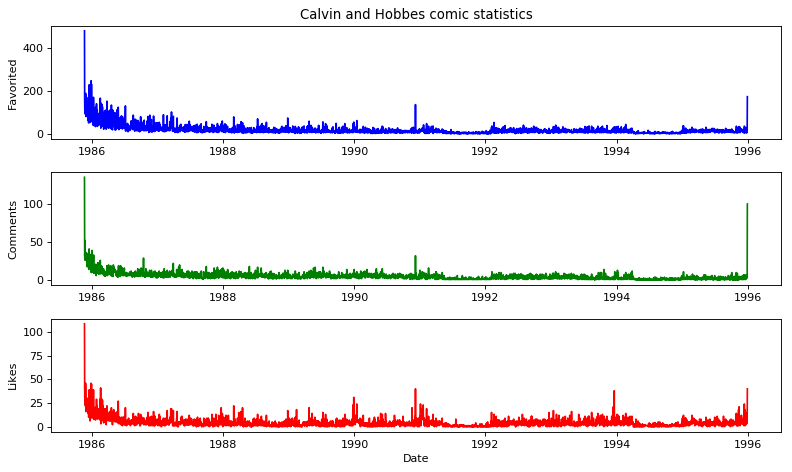

In [65]:
myFmt = mdates.DateFormatter('%Y')

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(311)
ax.plot(dates,fav, "b-", label="favorites")
plt.title("Calvin and Hobbes comic statistics")
plt.ylabel('Favorited')
ay = plt.subplot(312)
ay.plot(dates,comment, "g-", label="comments" )
plt.ylabel('Comments')
az = plt.subplot(313)
az.plot(dates,like, "r-", label="likes")
plt.ylabel('Likes')
az.xaxis.set_major_formatter(myFmt)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

(0.8550581055789891, 0.0)


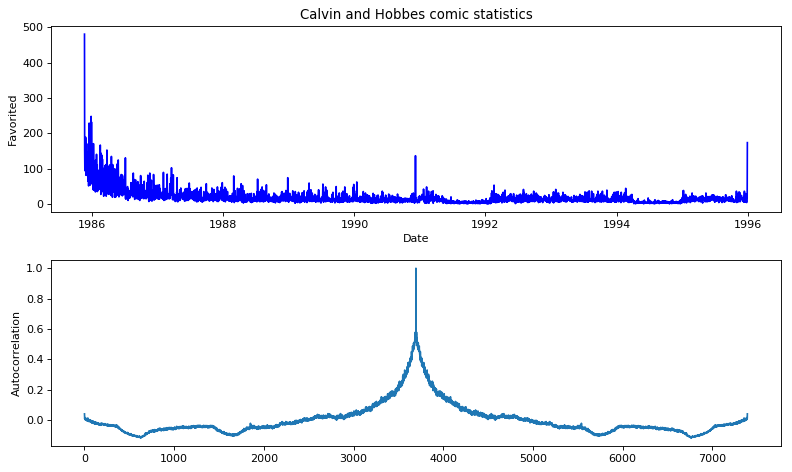

In [86]:
from scipy.stats.stats import pearsonr
result = pearsonr(fav, like)
print(result)

import numpy
myFmt = mdates.DateFormatter('%Y')

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

ax = plt.subplot(211)
ax.plot(dates, fav,"b-", label="favorites")
plt.title("Calvin and Hobbes comic statistics")
plt.ylabel('Favorited')


#ay = plt.subplot(412)
#ay.plot(dates,comment, "g-", label="comments" )
#plt.ylabel('Comments')
#az = plt.subplot(413)
#az.plot(dates,like, "r-", label="likes")
#plt.ylabel('Likes')
#az.xaxis.set_major_formatter(myFmt)
plt.xlabel('Date')

aa = plt.subplot(212)
# fav is array of values containing integer # favorited
y = fav - numpy.mean(fav)
norm = numpy.sum(y ** 2)
correlated = numpy.correlate(y, y, mode='full')/norm
aa.plot(correlated)
plt.ylabel('Autocorrelation')


plt.tight_layout()
plt.show()

In [97]:
numpy.where(correlated==0.51)

(array([], dtype=int64),)

In [96]:
numpy.where(correlated==0.5)

(array([], dtype=int64),)

In [100]:
for i in range(len(correlated) ):
    if( correlated[i] > 0.49 and correlated[i] < 0.51 ):
        print(i)

3669
3670
3673
3676
3677
3679
3711
3713
3714
3717
3720
3721


In [101]:
3715 - 3675

40